# pymofa tutorial 1

## Introduction

This notebook introduces the basic functionalities of pymofa, the python modeling framework to run and evaluate your models systematically

The last update happed on:

In [1]:
import datetime
print(datetime.datetime.now().date())

2017-10-18


if you work with this notebook interactively, exectue

In [2]:
# cd ..

to be at the pymofa root.

Can be left out if `pymofa` is (locally) installed at your system.

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## A discrete predetor prey dummy model
First we need to create a dummy model. Let's use a discrete version of the famous predator prey model.


In [4]:
def predprey_model(prey_birth_rate, prey_mortality, 
                   predator_efficiency, predator_death_rate,
                   initial_prey, initial_predators,
                   time_length):
    """Discrete predetor prey model."""
    A = -1 * np.ones(time_length)
    B = -1 * np.ones(time_length)
    A[0] = initial_prey
    B[0] = initial_predators
    for t in range(1, time_length):
        A[t] = A[t-1] + prey_birth_rate * A[t-1] - prey_mortality * B[t-1]*A[t-1]
        B[t] = B[t-1] + predator_efficiency * B[t-1]*A[t-1] - predator_death_rate * B[t-1] +\
            0.02 * (0.5 - np.random.rand())
    return A, B

**Example usage**:

In [5]:
preys, predators = predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000)

<IPython.core.display.Javascript object>


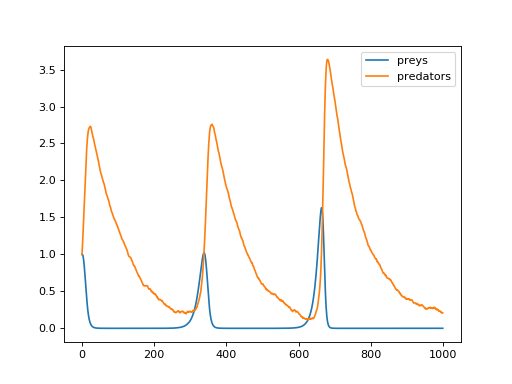

In [6]:
plt.plot(preys, label="preys") 
plt.plot(predators, label="predators")
plt.legend()

## Applying pymofa

In [7]:
cd ..

/home/wbarfuss/Documents/Work/Software/pymofa


In [8]:
# imports
from pymofa.experiment_handling import experiment_handling as eh
import itertools as it
# import cPickle

In [9]:
# Path where to Store the simulated Data
SAVE_PATH_RAW = "./tutorial/dummy/pmX01data"

In [10]:
# Definingh the experiment execution function
#      it gets paramater you want to investigate, plus `filename` as the last parameter
def RUN_FUNC(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length,
             store):  # <-- ich könnte hier die store function übergeben
    """Insightful docstring."""
    # poss. process
    prey_mortality = coupling
    predator_efficiency = coupling
    initial_prey = initial_pop
    initial_predators = initial_pop
    # one could also do more complicated stuff here, e.g. drawing something from a random distribution
    
    # running the model
    preys, predators = predprey_model(prey_birth_rate, prey_mortality, predator_efficiency,
                                      predator_death_rate, initial_prey, initial_predators,
                                      time_length)
    
    # preparing the data
    res = pd.DataFrame({"preys": np.array(preys),
                        "predators": np.array(predators)})
    res.index.name = "tstep"
    
    # return res
    store(res)
    
    #return res
    # Save Result
    #res.to_pickle(filename)
    
    # determine exit status (if something went wrong)
    # if exit status > 0 == run passed
    # if exit status < 0 == Run Failed
    exit_status = 42
    
    # RUN_FUNC needs to return exit_status 
    return exit_status

Note: runfunc result dataframe columns need to be in the same order
Better to give them alphabetically

In [11]:
runfunc_output = pd.DataFrame(columns=["predators", "preys"])
runfunc_output.index.name = "tstep"

In [12]:
# Parameter combinations to investiage
prey_birth_rate = [0.09, 0.1, 0.11]
coupling = [0.1]
predator_death_rate = [0.005, 0.01, 0.05, 0.1]
initial_pop = [1.0, 2.0]
time_length = [1000]

PARAM_COMBS = list(it.product(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length))

In [18]:
# Sample Size
SAMPLE_SIZE = 3

In [19]:
# INDEX 
INDEX = {i: RUN_FUNC.__code__.co_varnames[i] for i in range(RUN_FUNC.__code__.co_argcount-1)}

In [20]:
# initiate handle instance with experiment variables
handle = eh(SAMPLE_SIZE, PARAM_COMBS, INDEX, RUN_FUNC, runfunc_output, SAVE_PATH_RAW)

initializing pymofa experiment handle
detected 1 nodes in MPI environment
0 of 72 single computations left


In [21]:
# Compute experiemnts raw data
handle.compute()

0 of 72 single computations left
Only one node available. No parallel execution.
Saving rawdata at /home/wbarfuss/Documents/Work/Software/pymofa/tutorial/dummy/pmX01data.h5
Splitting calculations to 0 nodes.
Calculating 0 ...done.


In [16]:
handle.path_raw

'/home/wbarfuss/Documents/Work/Software/pymofa/tutorial/dummy/pmX01data.h5'

### getting index

In [18]:
store = pd.HDFStore(handle.path_raw)

In [55]:
store.select_as_coordinates?

In [63]:
with pd.HDFStore(handle.path_raw + "df") as store:
    d = store.select("dat", "prey_birth_rate = 3")

d.values

KeyError: 'No object named dat in the file'

In [65]:
[(pc, s) for s in range(SAMPLE_SIZE) for pc in PARAM_COMBS]

[((0.09, 0.1, 0.005, 1.0, 1000), 0),
 ((0.09, 0.1, 0.005, 2.0, 1000), 0),
 ((0.09, 0.1, 0.01, 1.0, 1000), 0),
 ((0.09, 0.1, 0.01, 2.0, 1000), 0),
 ((0.09, 0.1, 0.05, 1.0, 1000), 0),
 ((0.09, 0.1, 0.05, 2.0, 1000), 0),
 ((0.09, 0.1, 0.1, 1.0, 1000), 0),
 ((0.09, 0.1, 0.1, 2.0, 1000), 0),
 ((0.1, 0.1, 0.005, 1.0, 1000), 0),
 ((0.1, 0.1, 0.005, 2.0, 1000), 0),
 ((0.1, 0.1, 0.01, 1.0, 1000), 0),
 ((0.1, 0.1, 0.01, 2.0, 1000), 0),
 ((0.1, 0.1, 0.05, 1.0, 1000), 0),
 ((0.1, 0.1, 0.05, 2.0, 1000), 0),
 ((0.1, 0.1, 0.1, 1.0, 1000), 0),
 ((0.1, 0.1, 0.1, 2.0, 1000), 0),
 ((0.11, 0.1, 0.005, 1.0, 1000), 0),
 ((0.11, 0.1, 0.005, 2.0, 1000), 0),
 ((0.11, 0.1, 0.01, 1.0, 1000), 0),
 ((0.11, 0.1, 0.01, 2.0, 1000), 0),
 ((0.11, 0.1, 0.05, 1.0, 1000), 0),
 ((0.11, 0.1, 0.05, 2.0, 1000), 0),
 ((0.11, 0.1, 0.1, 1.0, 1000), 0),
 ((0.11, 0.1, 0.1, 2.0, 1000), 0),
 ((0.09, 0.1, 0.005, 1.0, 1000), 1),
 ((0.09, 0.1, 0.005, 2.0, 1000), 1),
 ((0.09, 0.1, 0.01, 1.0, 1000), 1),
 ((0.09, 0.1, 0.01, 2.0, 1000), 1)

In [133]:

with pd.HDFStore(handle.path_raw) as store:
    dat = store.select("dat", "sample=3 & initial_pop=2.0 & tstep>10 & tstep < 13 & prey_birth_rate =0.11")

len(dat.values)


0

In [50]:
rm -r ./tutorial/dummy/

In [45]:
dfq = pd.DataFrame(np.random.randn(10,4),columns=["predators", "preys", "C", "D"], 
                   index=pd.date_range('20130101',periods=10))

with pd.HDFStore("tmp.h5") as store:
    store.append('dfq',dfq,format='table', data_columns=True)
    

In [48]:
with pd.HDFStore("tmp.h5") as store:
    d = store.select('dfq',where="preys>0 and C>0")
d

,predators,preys,C,D
2013-01-05,0.288171,1.192002,1.280047,0.298282
2013-01-06,-0.402369,0.230675,1.061137,-0.852500
2013-01-10,1.560009,0.818562,0.942054,1.052205


In [88]:
INDEX


{0: 'prey_birth_rate',
 1: 'coupling',
 2: 'predator_death_rate',
 3: 'initial_pop',
 4: 'time_length'}

In [89]:
index_values = []
for p in INDEX.values():
    index_values.append(store.select_column("dat", p))
index_values.append(store.select_column("dat", "sample"))

In [92]:
taskdf = pd.DataFrame(index_values).T.drop_duplicates()

In [110]:
pcs = PARAM_COMBS[0] + (1,)

(pcs == taskdf.values).all(axis=1).any()

True

In [118]:
for z in zip(PARAM_COMBS[0], list(INDEX.values())):
    print(z)

(0.09, 'prey_birth_rate')
(0.1, 'coupling')
(0.005, 'predator_death_rate')
(1.0, 'initial_pop')
(1000, 'time_length')


In [116]:
INDEX.values()

dict_values(['prey_birth_rate', 'coupling', 'predator_death_rate', 'initial_pop', 'time_length'])